# 1. Introduction

## 1.1 Business Problem

FLO, an online footwear retailer, is seeking to categorize its customers and formulate marketing strategies tailored to
these segments. To achieve this goal, customer behaviors will be defined, and groups will be established based on
clustering within these behaviors.

## 1.2 Dataset Story

The dataset consists of information obtained from the historical shopping behaviors of customers who engaged in
OmniChannel (both online and offline shopping) for their latest purchases from Flo during the years 2020-2021.

## 1.3 Features

- `master_id` - Unique customer identifier
- `order_channel` - Indication of the platform used for shopping (Android, iOS, Desktop, Mobile)
- `last_order_channel` - The channel used for the most recent purchase
- `first_order_date` - Date of the customer's initial purchase
- `last_order_date` - Date of the customer's most recent purchase
- `last_order_date_online` - Date of the customer's last online purchase
- `last_order_date_offline` - Date of the customer's last offline purchase
- `order_num_total_ever_online` - Total number of purchases made online by the customer
- `order_num_total_ever_offline` - Total number of purchases made offline by the customer
- `customer_value_total_ever_offline` - Total amount spent by the customer in offline purchases
- `customer_value_total_ever_online` - Total amount spent by the customer in online purchases
- `interested_in_categories_12` - List of categories in which the customer has made purchases in the last 12 months

# 2. Data Preparation

## 2.1 Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

## 2.2 Loading Data

In [2]:
# Load the dataset
customers = pd.read_csv('flo_data_20k.csv',
                        parse_dates=['first_order_date', 'last_order_date', 'last_order_date_online',
                                     'last_order_date_offline'])

In [3]:
# Display the first few rows
customers.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[WOMEN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[MEN, KIDS, WOMEN, SPORTSWEAR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[MEN, WOMEN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[KIDS_SPORTSWEAR, KIDS]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[SPORTSWEAR]


## 2.3 Inspecting Data

In [4]:
# Display basic statistics about the dataset
customers.describe()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online
count,19945.000000,19945.000000,19945.000000,19945.000000
mean,3.110855,1.913913,253.922597,497.321690
std,4.225647,2.062880,301.532853,832.601886
min,1.000000,1.000000,10.000000,12.990000
25%,1.000000,1.000000,99.990000,149.980000
50%,2.000000,1.000000,179.980000,286.460000
75%,4.000000,2.000000,319.970000,578.440000
max,200.000000,109.000000,18119.140000,45220.130000


In [5]:
# Display information about the dataset
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [6]:
# Identify columns with null values
customers.isnull().any()

master_id                            False
order_channel                        False
last_order_channel                   False
first_order_date                     False
last_order_date                      False
last_order_date_online               False
last_order_date_offline              False
order_num_total_ever_online          False
order_num_total_ever_offline         False
customer_value_total_ever_offline    False
customer_value_total_ever_online     False
interested_in_categories_12          False
dtype: bool

In [7]:
# Get the number of unique values in each column
customers.nunique()

master_id                            19945
order_channel                            4
last_order_channel                       5
first_order_date                      2465
last_order_date                        366
last_order_date_online                1743
last_order_date_offline                738
order_num_total_ever_online             57
order_num_total_ever_offline            32
customer_value_total_ever_offline     6097
customer_value_total_ever_online     11292
interested_in_categories_12             32
dtype: int64

# 3. Data Preprocessing

## 3.1 Feature Engineering

In [8]:
# Calculate total order numbers and customer values
customers['order_num_total'] = customers['order_num_total_ever_online'] + customers['order_num_total_ever_offline']
customers['customer_value_total'] = customers['customer_value_total_ever_online'] + customers[
    'customer_value_total_ever_offline']

In [9]:
# Set analysis date
analysis_date = customers['last_order_date'].max() + pd.Timedelta(days=1)

# Calculate recency and tenure for each customer
customers['recency'] = (analysis_date - customers['last_order_date']).dt.days
customers['tenure'] = (customers['last_order_date'] - customers['first_order_date']).dt.days

In [10]:
# Convert number of order columns to int format
num_order_cols = customers.columns[customers.columns.str.contains('order_num')]
customers[num_order_cols] = customers[num_order_cols].astype(int)

# Convert date columns to datetime format
date_cols = customers.columns[customers.columns.str.contains('date')]
customers[date_cols] = customers[date_cols].apply(pd.to_datetime)

# Check conversion
customers[num_order_cols.append(date_cols)].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   order_num_total_ever_online   19945 non-null  int64         
 1   order_num_total_ever_offline  19945 non-null  int64         
 2   order_num_total               19945 non-null  int64         
 3   first_order_date              19945 non-null  datetime64[ns]
 4   last_order_date               19945 non-null  datetime64[ns]
 5   last_order_date_online        19945 non-null  datetime64[ns]
 6   last_order_date_offline       19945 non-null  datetime64[ns]
dtypes: datetime64[ns](4), int64(3)
memory usage: 1.1 MB


In [11]:
def categorize_columns(df, cat_th=10, high_card_th=20, report=False):
    """
    Categorizes columns in a DataFrame based on specified thresholds.

    Args:
        df (DataFrame): The DataFrame to categorize.
        cat_th (int, optional): Threshold for considering a column as categorical. Defaults to 10.
        high_card_th (int, optional): Threshold for considering a categorical column as having high cardinality. Defaults to 20.
        report (bool, optional): If True, prints a report of the categorization. Defaults to False.

    Returns:
        list: List of categorical columns.
        list: List of numerical columns.
        list: List of categorical columns with high cardinality.
    """
    # Identify categorical columns with high cardinality
    high_card_cols = [col for col in df.columns if
                      df[col].dtype in ["category", "object"] and df[col].nunique() > high_card_th]

    # Identify numerical columns that are treated as categorical
    num_but_cat_cols = [col for col in df.columns if
                        df[col].dtype in ["float64", "int64"] and df[col].nunique() < cat_th]

    # Identify categorical columns
    cat_cols = [col for col in df.columns if
                (df[col].dtype in ["category", "object", "bool"] and col not in high_card_cols) or
                (col in num_but_cat_cols)]

    # Identify numerical columns
    num_cols = [col for col in df.columns if df[col].dtype in ["float64", "int64"] and col not in cat_cols]

    # Print dataset overview
    print(f"Dataset Overview:")
    print(f" - Total columns: {df.shape[1]}")
    print(f" - Numerical columns: {len(num_cols)}")
    print(f"\t{num_cols}") if report else _
    print(f" - Numerical columns treated as categorical: {len(num_but_cat_cols)}")
    print(f"\t{num_but_cat_cols}") if report else _
    print(f" - Categorical columns: {len(cat_cols)}")
    print(f"\t{cat_cols}") if report else _
    print(f" - Columns with high cardinality: {len(high_card_cols)}")
    print(f"\t{high_card_cols}") if report else _

    return cat_cols, num_cols, high_card_cols


# Categorize columns of the dataset
cat_cols, num_cols, high_card_cols = categorize_columns(customers, report=True)

# Use only numerical columns
customers = customers[num_cols]

Dataset Overview:
 - Total columns: 16
 - Numerical columns: 8
	['order_num_total_ever_online', 'order_num_total_ever_offline', 'customer_value_total_ever_offline', 'customer_value_total_ever_online', 'order_num_total', 'customer_value_total', 'recency', 'tenure']
 - Numerical columns treated as categorical: 0
	[]
 - Categorical columns: 2
	['order_channel', 'last_order_channel']
 - Columns with high cardinality: 2
	['master_id', 'interested_in_categories_12']


## 3.2 Feature Scaling

In [12]:
# Perform standard scaling on numerical columns
scaler = StandardScaler()
customers[num_cols] = scaler.fit_transform(customers[num_cols])

# Display scaled columns
customers[num_cols]

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,order_num_total,customer_value_total,recency,tenure
0,0.210422,-0.443039,-0.377854,0.362797,-0.005222,0.210107,-0.382058,-1.049283
1,3.760263,0.041732,-0.311591,1.628981,3.368463,1.409799,-0.285232,1.536364
2,-0.026234,0.041732,-0.212097,-0.122477,-0.005222,-0.185312,0.499055,-0.576206
3,-0.499547,-0.443039,-0.709501,-0.498860,-0.637788,-0.702802,0.005244,-1.256135
4,-0.499547,-0.443039,-0.676337,-0.405164,-0.637788,-0.604508,-0.469201,-0.162502
...,...,...,...,...,...,...,...,...
19940,-0.499547,0.041732,0.119583,-0.462828,-0.426933,-0.390096,1.903025,-0.725599
19941,-0.499547,-0.443039,-0.343064,-0.309077,-0.637788,-0.402929,0.256991,-0.710276
19942,-0.262891,-0.443039,-0.377887,-0.005239,-0.426933,-0.132128,-1.224440,-0.087806
19943,-0.499547,1.496046,1.518504,-0.239426,0.205633,0.288733,-0.256184,0.042434


# 4. Modeling

## 4.1 K-Means

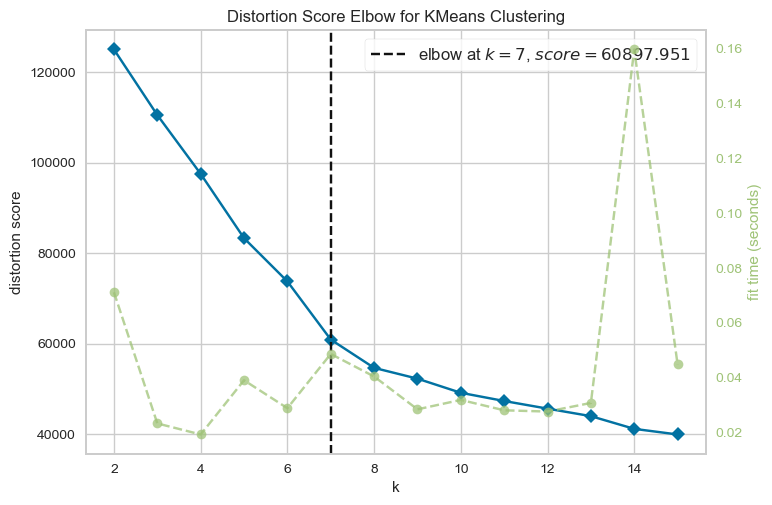

Optimal k-value: 7


In [13]:
# Initialize the model
km = KMeans(n_init='auto', random_state=1923)

# Initialize elbow method visualizer
elbow = KElbowVisualizer(km, k=(2, 16))

# Train the model
elbow.fit(customers)

# Display the elbow plot
elbow.show()

# Display the optimal k-value
print(f"Optimal k-value: {elbow.elbow_value_}")

In [14]:
# Initialize the final model
km = KMeans(n_clusters=elbow.elbow_value_, n_init='auto', random_state=1923)

# Train the model
km = km.fit_predict(customers)

# Add segments data to the DataFrame
customers['segment'] = km + 1

# Display the DataFrame
customers

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,order_num_total,customer_value_total,recency,tenure,segment
0,0.210422,-0.443039,-0.377854,0.362797,-0.005222,0.210107,-0.382058,-1.049283,7
1,3.760263,0.041732,-0.311591,1.628981,3.368463,1.409799,-0.285232,1.536364,4
2,-0.026234,0.041732,-0.212097,-0.122477,-0.005222,-0.185312,0.499055,-0.576206,1
3,-0.499547,-0.443039,-0.709501,-0.498860,-0.637788,-0.702802,0.005244,-1.256135,7
4,-0.499547,-0.443039,-0.676337,-0.405164,-0.637788,-0.604508,-0.469201,-0.162502,7
...,...,...,...,...,...,...,...,...,...
19940,-0.499547,0.041732,0.119583,-0.462828,-0.426933,-0.390096,1.903025,-0.725599,1
19941,-0.499547,-0.443039,-0.343064,-0.309077,-0.637788,-0.402929,0.256991,-0.710276,1
19942,-0.262891,-0.443039,-0.377887,-0.005239,-0.426933,-0.132128,-1.224440,-0.087806,7
19943,-0.499547,1.496046,1.518504,-0.239426,0.205633,0.288733,-0.256184,0.042434,2


In [15]:
# Generate summary statistics about the segments
round(customers.groupby('segment').agg(['count', 'mean', 'min', 'max']), 2).T

segment                                        1        2        3       4  \
order_num_total_ever_online       count  5814.00  2042.00  2260.00  771.00   
                                  mean     -0.28    -0.02     0.44    3.23   
                                  min      -0.50    -0.50    -0.50   -0.03   
                                  max       1.87     2.34     3.29   16.30   
order_num_total_ever_offline      count  5814.00  2042.00  2260.00  771.00   
                                  mean     -0.20     1.29    -0.07    0.12   
                                  min      -0.44    -0.44    -0.44   -0.44   
                                  max       1.98    10.71     4.40    6.83   
customer_value_total_ever_offline count  5814.00  2042.00  2260.00  771.00   
                                  mean     -0.23     1.56    -0.11    0.05   
                                  min      -0.81    -0.29    -0.80   -0.80   
                                  max       2.00    13.50     3.07    7.67   
customer_value_total_ever_online  count  5814.00  2042.00  2260.00  771.00   
                                  mean     -0.23     0.02     0.17    2.67   
                                  min      -0.58    -0.58    -0.58    0.42   
                                  max       2.35     3.58     2.37   14.47   
order_num_total                   count  5814.00  2042.00  2260.00  771.00   
                                  mean     -0.34     0.54     0.36    2.93   
                                  min      -0.64    -0.64    -0.64   -0.22   
                                  max       1.47     5.48     2.74   14.75   
customer_value_total              count  5814.00  2042.00  2260.00  771.00   
                                  mean     -0.29     0.55     0.12    2.50   
                                  min      -0.79    -0.47    -0.79    0.22   
                                  max       2.05     4.59     2.36   13.37   
recency                           count  5814.00  2042.00  2260.00  771.00   
                                  mean      1.16    -0.33     0.04   -0.38   
                                  min       0.16    -1.28    -1.28   -1.28   
                                  max       2.25     2.23     2.25    2.22   
tenure                            count  5814.00  2042.00  2260.00  771.00   
                                  mean     -0.47     0.01     2.00    1.19   
                                  min      -1.28    -1.28    -0.33   -1.23   
                                  max       1.94     4.03     4.53    4.53   

segment                                      5      6        7  
order_num_total_ever_online       count  14.00   7.00  9037.00  
                                  mean    0.01  20.33    -0.21  
                                  min    -0.50   1.63    -0.50  
                                  max     2.34  46.60     2.34  
order_num_total_ever_offline      count  14.00   7.00  9037.00  
                                  mean   24.45  -0.17    -0.19  
                                  min     0.53  -0.44    -0.44  
                                  max    51.91   1.01     1.50  
customer_value_total_ever_offline count  14.00   7.00  9037.00  
                                  mean   18.03   0.86    -0.21  
                                  min     7.97  -0.68    -0.80  
                                  max    59.25   3.35     1.81  
customer_value_total_ever_online  count  14.00   7.00  9037.00  
                                  mean    0.29  32.33    -0.16  
                                  min    -0.54  14.09    -0.58  
                                  max     3.80  53.72     2.68  
order_num_total                   count  14.00   7.00  9037.00  
                                  mean   10.64  18.04    -0.27  
                                  min    -0.22   1.26    -0.64  
                                  max    22.35  41.53     1.89  
customer_value_total              count  14.00   7.00  9037.

## 4.2 Agglomerative Clustering

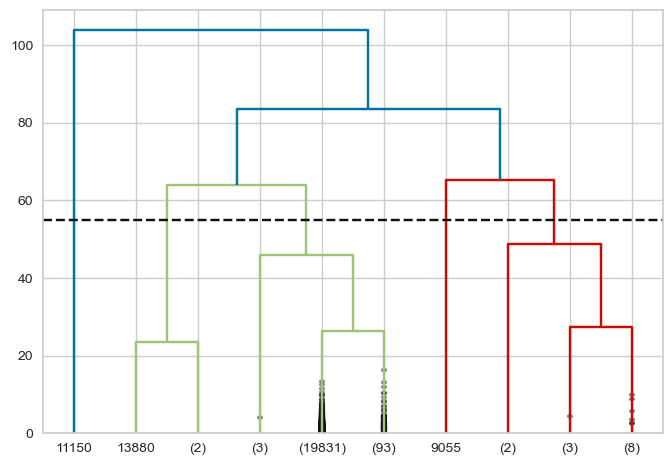

In [16]:
# Drop previous segment column
customers.drop('segment', axis=1, inplace=True)

# Compute the linkage matrix
Z = linkage(customers, method='complete')

# Generate dendrogram
dendrogram(Z, truncate_mode='lastp', p=10, show_contracted=True, leaf_font_size=10)

# Draw horizontal line to aid in choosing
plt.axhline(y=55, color='k', linestyle='--')

# Display the dendrogram
plt.show()

In [17]:
# Initialize the final model
agg = AgglomerativeClustering(n_clusters=5)

# Train the model
agg = agg.fit_predict(customers)

# Add segments data to the DataFrame
customers['segment'] = agg + 1

# Display the DataFrame
customers

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,order_num_total,customer_value_total,recency,tenure,segment
0,0.210422,-0.443039,-0.377854,0.362797,-0.005222,0.210107,-0.382058,-1.049283,1
1,3.760263,0.041732,-0.311591,1.628981,3.368463,1.409799,-0.285232,1.536364,3
2,-0.026234,0.041732,-0.212097,-0.122477,-0.005222,-0.185312,0.499055,-0.576206,5
3,-0.499547,-0.443039,-0.709501,-0.498860,-0.637788,-0.702802,0.005244,-1.256135,1
4,-0.499547,-0.443039,-0.676337,-0.405164,-0.637788,-0.604508,-0.469201,-0.162502,1
...,...,...,...,...,...,...,...,...,...
19940,-0.499547,0.041732,0.119583,-0.462828,-0.426933,-0.390096,1.903025,-0.725599,5
19941,-0.499547,-0.443039,-0.343064,-0.309077,-0.637788,-0.402929,0.256991,-0.710276,1
19942,-0.262891,-0.443039,-0.377887,-0.005239,-0.426933,-0.132128,-1.224440,-0.087806,1
19943,-0.499547,1.496046,1.518504,-0.239426,0.205633,0.288733,-0.256184,0.042434,1


In [18]:
# Generate summary statistics about the segments
round(customers.groupby('segment').agg(['count', 'mean', 'min', 'max']), 2).T

segment                                         1      2        3      4  \
order_num_total_ever_online       count  13607.00  14.00  1174.00   4.00   
                                  mean      -0.11   0.01     2.63  20.44   
                                  min       -0.50  -0.50    -0.03   1.63   
                                  max        3.29   2.34    30.03  46.60   
order_num_total_ever_offline      count  13607.00  14.00  1174.00   4.00   
                                  mean       0.07  24.45    -0.01  -0.32   
                                  min       -0.44   0.53    -0.44  -0.44   
                                  max       10.71  51.91     6.83   0.04   
customer_value_total_ever_offline count  13607.00  14.00  1174.00   4.00   
                                  mean       0.10  18.03    -0.10   1.33   
                                  min       -0.81   7.97    -0.80  -0.41   
                                  max       13.50  59.25     4.61   3.35   
customer_value_total_ever_online  count  13607.00  14.00  1174.00   4.00   
                                  mean      -0.08   0.29     2.00  43.02   
                                  min       -0.58  -0.54    -0.24  36.26   
                                  max        3.65   3.80    20.54  53.72   
order_num_total                   count  13607.00  14.00  1174.00   4.00   
                                  mean      -0.07  10.64     2.34  18.08   
                                  min       -0.64  -0.22    -0.22   1.26   
                                  max        5.48  22.35    26.56  41.53   
customer_value_total              count  13607.00  14.00  1174.00   4.00   
                                  mean      -0.04   6.34     1.83  40.45   
                                  min       -0.79   2.24    -0.15  34.04   
                                  max        4.59  22.29    19.76  50.43   
recency                           count  13607.00  14.00  1174.00   4.00   
                                  mean      -0.44   0.19    -0.15  -0.83   
                                  min       -1.28  -0.96    -1.28  -1.17   
                                  max        2.25   1.95     2.25  -0.35   
tenure                            count  13607.00  14.00  1174.00   4.00   
                                  mean       0.03  -0.02     1.48   1.79   
                                  min       -1.28  -1.24    -0.97  -1.19   
                                  max        4.52   1.21     4.53   4.01   

segment                                        5  
order_num_total_ever_online       count  5146.00  
                                  mean     -0.32  
                                  min      -0.50  
                                  max       1.16  
order_num_total_ever_offline      count  5146.00  
                                  mean     -0.24  
                                  min      -0.44  
                                  max       1.50  
customer_value_total_ever_offline count  5146.00  
                                  mean     -0.30  
                                  min      -0.81  
                                  max       2.00  
customer_value_total_ever_online  count  5146.00  
                                  mean     -0.28  
                                  min      -0.58  
                                  max       1.23  
order_num_total                   count  5146.00  
                                  mean     -0.39  
                                  min      -0.64  
                                  max       1.26  
customer_value_total              count  5146.00  
                                  mean     -0.36  
                                  min      -0.79  
                                  max       1.08  
recency                           count  5146.00  
                                  mean      1.19  
                                  min      -0.58  
                                  max       2.25  
tenure      